# Setup

In [1]:
%load_ext autoreload
%autoreload 2

import os
import re
import functools
import numpy as np
import pandas as pd
import corescpy as cr

# Constants
col_fff, col_obj = cr.pp.COL_FFF, cr.pp.COL_OBJECT
kws = dict(col_sample_id=cr.pp.COL_SAMPLE_ID, col_subject=cr.pp.COL_SUBJECT)
show_cols = [cr.pp.COL_SUBJECT, cr.pp.COL_SAMPLE_ID_O, cr.pp.COL_CONDITION,
             cr.pp.COL_INFLAMED, cr.pp.COL_STRICTURE, cr.pp.COL_SLIDE]

# File Paths
write_object, write_clusters, plot_clusters = True, True, True
panel_id = "TUQ97N"
direc = "/mnt/cho_lab/bbdata2/"
dir_data = os.path.join(direc, f"outputs/{panel_id}")
dir_writeable = "/mnt/cho_lab/disk2/elizabeth/data/shared-xenium-library"
out_dir = os.path.join(dir_writeable, f"outputs/{panel_id}/nebraska")
plot_dir = os.path.join(out_dir, "plots")
mdf = os.path.join(dir_writeable, "samples.csv")  # metadata file
man_anns = ["res1pt5_dist0_npc30", "res0pt75_dist0pt3_npc30",
            "res0pt5_dist0pt5_npc30"]  # clustering run suffix names
file_annotations = os.path.join(
    out_dir, "annotation_dictionaries/annotations_all.xlsx")
col_annotation = "annotation"
metadata = metadata = cr.pp.get_metadata_cho(
    direc, mdf, panel_id=panel_id)
for x in metadata.index:
    fmr = pd.read_excel(file_annotations, index_col=[0, 1])[
    col_annotation].dropna().astype(str)  # annotation mapping
kws_init = dict(col_sample_id=cr.pp.COL_SAMPLE_ID,
                col_subject=cr.pp.COL_SUBJECT)
for i, x in enumerate(metadata.index.values):
    metadata.loc[x, col_obj] = os.path.join(out_dir, x + ".h5ad")
metadata[show_cols + [col_obj]]

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

,Name,Sample ID,Condition,Inflammation,Stricture,Slide Id,out_file
Sample,,,,,,,
Uninflamed-50336C,50336,50336C,Uninflamed,uninflamed,no,11047,/mnt/cho_lab/disk2/elizabeth/data/shared-xeniu...
Inflamed-50336B,50336,50336B,Inflamed,inflamed,no,11044,/mnt/cho_lab/disk2/elizabeth/data/shared-xeniu...
Stricture-50336A,50336,50336A,Stricture,inflamed,yes,10496,/mnt/cho_lab/disk2/elizabeth/data/shared-xeniu...
Stricture-50403C2,50403,50403C2,Stricture,inflamed,yes,21979,/mnt/cho_lab/disk2/elizabeth/data/shared-xeniu...
Stricture-50403C1,50403,50403C1,Stricture,inflamed,yes,21978,/mnt/cho_lab/disk2/elizabeth/data/shared-xeniu...
Inflamed-50403B,50403,50403B,Inflamed,inflamed,no,10592,/mnt/cho_lab/disk2/elizabeth/data/shared-xeniu...
Uninflamed-50403A1,50403,50403A1,Uninflamed,uninflamed,no,10589,/mnt/cho_lab/disk2/elizabeth/data/shared-xeniu...
Uninflamed-50403A2,50403,50403A2,Uninflamed,uninflamed,no,10589,/mnt/cho_lab/disk2/elizabeth/data/shared-xeniu...
Stricture-50217C,50217,50217C,Stricture,inflamed,yes,10463,/mnt/cho_lab/disk2/elizabeth/data/shared-xeniu...


# Update Object & Outputs

Update annotations and metadata; save spatial cluster plots.





Uninflamed-50336C





<<< INITIALIZING SPATIAL CLASS OBJECT >>>

INFO     reading                                                                                                   
         /mnt/cho_lab/bbdata2/outputs/TUQ97N/CHO-010/output-XETG00189__0011047__50336C-TUQ97N-EA__20240422__175051/
         cell_feature_matrix.h5                                                                                    


Counts: Initial


	Observations: 387961

	Genes: 469







 AnnData object with n_obs × n_vars = 387961 × 469
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'z_level', 'nucleus_count', 'cell_labels', 'Sample'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs', 'spatial', 'original_ix'
    obsm: 'spatial'
    layers: 'counts' 

                      gene_ids    feature_types   genome
gene_sym

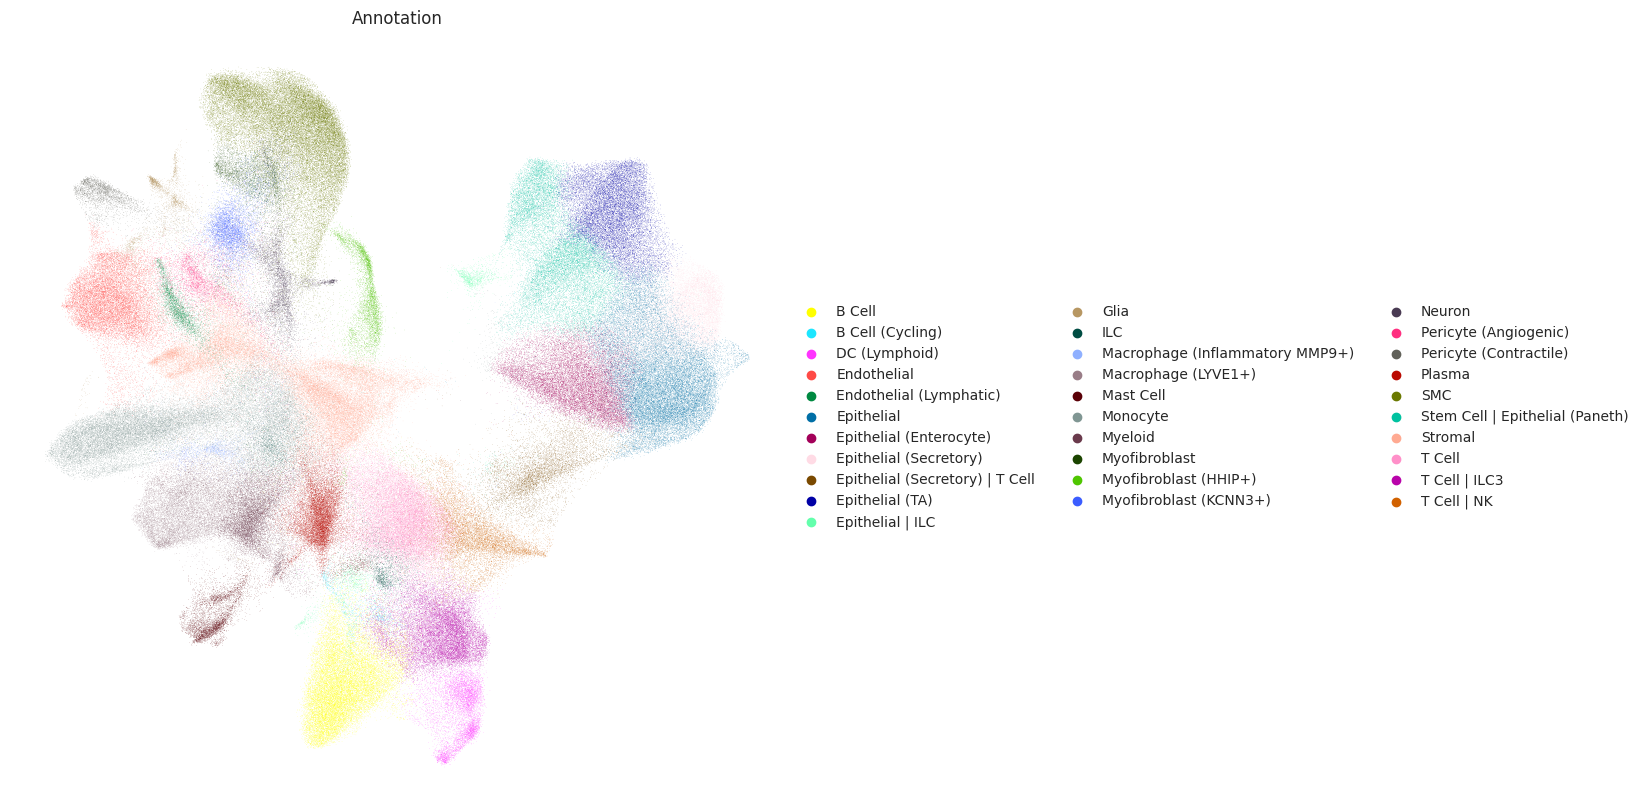

Markers File: /mnt/cho_lab/disk2/elizabeth/data/shared-xenium-library/outputs/TUQ97N/nebraska/find_markers/Uninflamed-50336C___leiden_res1pt5_dist0_npc30_markers.csv
Clusters File: /mnt/cho_lab/disk2/elizabeth/data/shared-xenium-library/outputs/TUQ97N/nebraska/Uninflamed-50336C___leiden_res1pt5_dist0_npc30.csv


Markers File: /mnt/cho_lab/disk2/elizabeth/data/shared-xenium-library/outputs/TUQ97N/nebraska/find_markers/Uninflamed-50336C___annotation_res1pt5_dist0_npc30_markers.csv
Clusters File: /mnt/cho_lab/disk2/elizabeth/data/shared-xenium-library/outputs/TUQ97N/nebraska/Uninflamed-50336C___annotation_res1pt5_dist0_npc30.csv


Uninflamed-50336C not in annotation dictionary.
Markers File: /mnt/cho_lab/disk2/elizabeth/data/shared-xenium-library/outputs/TUQ97N/nebraska/find_markers/Uninflamed-50336C___leiden_res0pt75_dist0pt3_npc30_markers.csv
Clusters File: /mnt/cho_lab/disk2/elizabeth/data/shared-xenium-library/outputs/TUQ97N/nebraska/Uninflamed-50336C___leiden_res0pt75_dist0pt3_npc30.

In [2]:
fmr = pd.read_excel(file_annotations, index_col=[0, 1])[
    col_annotation].dropna().astype(str)  # annotation mapping

for i, x in enumerate(metadata.index.values):
    if os.path.exists(metadata.loc[x][col_obj]) is False:
        print(f"\n\n\n{'=' * 80}\n\n{x}: {metadata.loc[x][col_obj]} "
              f"(object file) missing\n\n{'=' * 80}\n\n")
        continue
    print(f"\n\n\n{'=' * 80}\n\n{x}\n\n{'=' * 80}\n\n")

    # Object & Metadata
    self = cr.Spatial(metadata.loc[x][col_fff], library_id=x, **kws)
    self.update_from_h5ad(metadata.loc[x][col_obj])
    for j in metadata.dropna(how="all", axis=1):  # iterate metadata columns
        self.rna.obs.loc[:, j] = str(metadata.loc[x][j])  # add to object
    self.rna.obs.loc[:, self._columns["col_sample_id"]] = x

    # Manual Annotations
    for r in man_anns:
        if f"leiden_{r}" not in self.rna.obs.columns:
            print(f"\n\n{x}: Column 'leiden_{r}' missing.\n\n")
            continue
        i_x = f"{x}___leiden_{r}_dictionary.xlsx"
        if i_x not in [v[0] for v in fmr.index]:
            print(f"{x} not in annotation dictionary.")
        else:
            self.annotate_clusters(
                fmr.loc[i_x], copy=False, col_cell_type=f"leiden_{r}")

        # Write & Plot Clusters?
        for v in [f"leiden_{r}", f"{col_annotation}_{r}"]:
            if v not in self.rna.obs.columns:
                continue
            if write_clusters is True:  # write cluster files for Xenium Explorer
                self.write_clusters(
                    out_dir, col_cell_type=v, overwrite=True,
                    file_prefix=f"{x}__", n_top="find_markers")
            if plot_clusters is True:  # plot clusters individually
                self.plot_clusters(col_cell_type=v, out_dir=os.path.join(
                    plot_dir, x, f"{x}__{v}.pdf"), multi_pdf=True)

    # Write Object?
    if write_object is True:
        self.write(metadata.loc[x][col_obj])

# Workspace

/mnt/cho_lab/disk2/elizabeth/data/shared-xenium-library/outputs/TUQ97N/nebraska/plots/Uninflamed-50336C/Uninflamed-50336C__leiden_res1pt5_dist0_npc30.pdfalready exists
/mnt/cho_lab/disk2/elizabeth/data/shared-xenium-library/outputs/TUQ97N/nebraska/plots/Inflamed-50336B/Inflamed-50336B__leiden_res1pt5_dist0_npc30.pdfalready exists




Stricture-50336A





<<< INITIALIZING SPATIAL CLASS OBJECT >>>

INFO     reading                                                                                                   
         /mnt/cho_lab/bbdata2/outputs/TUQ97N/CHO-009/output-XETG00189__0010496__50336A-TUQ97N-EA__20240418__170624/
         cell_feature_matrix.h5                                                                                    


Counts: Initial


	Observations: 465118

	Genes: 469







 AnnData object with n_obs × n_vars = 465118 × 469
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_code

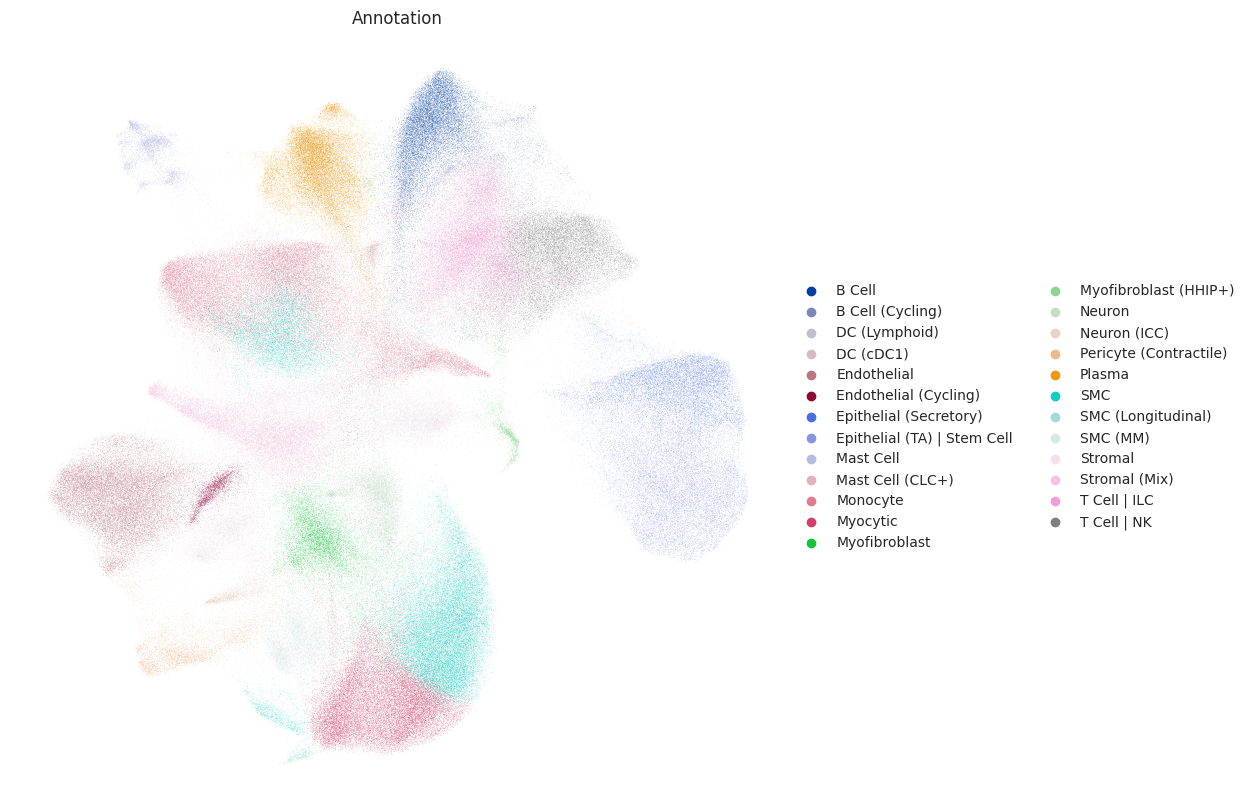

Markers File: /mnt/cho_lab/disk2/elizabeth/data/shared-xenium-library/outputs/TUQ97N/nebraska/find_markers/Stricture-50336A___leiden_res1pt5_dist0_npc30_markers.csv
Clusters File: /mnt/cho_lab/disk2/elizabeth/data/shared-xenium-library/outputs/TUQ97N/nebraska/Stricture-50336A___leiden_res1pt5_dist0_npc30.csv






Stricture-50403C2





<<< INITIALIZING SPATIAL CLASS OBJECT >>>

INFO     reading                                                                                                   
         /mnt/cho_lab/bbdata2/outputs/TUQ97N/CHO-012/output-XETG00189__0021979__50403C2-TUQ97N-EA__20240516__190239
         /cell_feature_matrix.h5                                                                                   


Counts: Initial


	Observations: 844288

	Genes: 469







 AnnData object with n_obs × n_vars = 844288 × 469
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'tota

In [ ]:
fmr = pd.read_excel(file_annotations, index_col=[0, 1])[
    col_annotation].dropna().astype(str)  # annotation mapping

for i, x in enumerate(metadata.index.values):

    if os.path.exists(os.path.join(
            plot_dir, x, f"{x}__{col_annotation}_{man_anns[0]}.pdf")):
        print(os.path.join(
            plot_dir, x, f"{x}__{col_annotation}_{man_anns[0]}.pdf"
            ) + "already exists")
        continue


    if os.path.exists(metadata.loc[x][col_obj]) is False:
        print(f"\n\n\n{'=' * 80}\n\n{x}: {metadata.loc[x][col_obj]} "
              f"(object file) missing\n\n{'=' * 80}\n\n")
        continue
    print(f"\n\n\n{'=' * 80}\n\n{x}\n\n{'=' * 80}\n\n")

    # Object & Metadata
    self = cr.Spatial(metadata.loc[x][col_fff], library_id=x, **kws)
    self.update_from_h5ad(metadata.loc[x][col_obj])
    for j in metadata.dropna(how="all", axis=1):  # iterate metadata columns
        self.rna.obs.loc[:, j] = str(metadata.loc[x][j])  # add to object
    self.rna.obs.loc[:, self._columns["col_sample_id"]] = x

    # Manual Annotations
    for r in [man_anns[0]]:
        if f"leiden_{r}" not in self.rna.obs.columns:
            print(f"\n\n{x}: Column 'leiden_{r}' missing.\n\n")
            continue
        i_x = f"{x}___leiden_{r}_dictionary.xlsx"
        if i_x not in [v[0] for v in fmr.index]:
            print(f"{x} not in annotation dictionary.")
        else:
            self.annotate_clusters(
                fmr.loc[i_x], copy=False, col_cell_type=f"leiden_{r}")

        # Write & Plot Clusters?
        for v in [f"leiden_{r}"]:
            if v not in self.rna.obs.columns:
                continue
            if write_clusters is True:  # write cluster files for Xenium Explorer
                self.write_clusters(
                    out_dir, col_cell_type=v, overwrite=True,
                    file_prefix=f"{x}__", n_top="find_markers")
            if plot_clusters is True:  # plot clusters individually
                self.plot_clusters(col_cell_type=v, out_dir=os.path.join(
                    plot_dir, x, f"{x}__{v}.pdf"), multi_pdf=True)

    # Write Object?
    if write_object is True:
        self.write(metadata.loc[x][col_obj])